## Data Preprocessing Code

We conducted our data preprocessing in two steps:

**Step 1: Preliminary analysis based on observation**
1. Remove columns based on common sense (e.g. remove those that obviously do not make sense: scrape id, listing url)
2. Remove features showing repetitive information, e.g. access is repeated with description； Review_scores_value is repeated with review_scores_rating.
3. Basic preprocessing to ensure EDA could be meaningfully carried out: Numerical fields conversion, categorical fields encoding and preprocessing
**Step 2: Exploratory data analysis and Preprocessing**
1. Explore no. of NA in the remaining fields and remove fields with too many NAs
2. Explore the text fields and clean text fields: remove punctuation, stop words, convert to lower case
3. Explore categorical fields and their relationship with listing price
 (neighbourhood, property type, bed type, room type)
4. Explore numerical fields and their correlation with price







# Load Data

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
pathlistings = '/content/gdrive/My Drive/BT4222 project/100K Sampled Data/10klistings_2yrs.csv'
df_listings = pd.read_csv(pathlistings)
len(df_listings)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,7,9,10,11,12,13,14,26,29,31,43,47,52,55,56,65,67,68,106) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


100000

In [0]:
df_listings.head()

,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,country,country_code,description,experiences_offered,extra_people,first_review,guests_included,has_availability,host_about,host_acceptance_rate,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_picture_url,host_response_rate,...,minimum_nights_avg_ntm,monthly_price,name,neighborhood_overview,neighbourhood,neighbourhood_cleansed,neighbourhood_group,neighbourhood_group_cleansed,notes,number_of_reviews,number_of_reviews_ltm,picture_url,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,smart_location,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode,nacount
0,NaN,7.0,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,Wa...",17.0,144,36,62.0,2,Real Bed,3,4,1,NaN,NaN,NaN,2018-10-03,today,strict_14_with_grace_period,New York,$100.00,United States,US,Come enjoy my 3 bedroom/2 bathroom apartment,none,$0.00,2018-09-18,1,t,NaN,NaN,t,2.14706e+08,f,f,1.0,US,Kristi,Alphabet City,https://a0.muscache.com/im/pictures/user/2ba14...,NaN,...,NaN,NaN,Spacious 3BD/2BTH in ♡ of the East Village,NaN,Alphabet City,East Village,NaN,Manhattan,NaN,2.0,NaN,https://a0.muscache.com/im/pictures/0f706e47-8...,$475.00,Apartment,f,f,f,10.0,10.0,10.0,10.0,10.0,100.0,10.0,2.00,Entire home/apt,2.018100e+13,$0.00,"New York, NY",NaN,NaN,NY,"New York, NY, United States",Come enjoy my 3 bedroom/2 bathroom apartment,NaN,NaN,NaN,NaN,10009,0.0
1,NaN,2.0,"{Wifi,""Air conditioning"",Kitchen,""Indoor firep...",0.0,0,0,0.0,1,Real Bed,1,1,2,0,2,0,2019-12-05,5 months ago,moderate,Brooklyn,$40.00,United States,US,Our place is a beautifully renovated entire br...,none,$20.00,2018-01-01,1,t,NaN,NaN,t,1.04405e+07,t,f,2.0,"New York, New York, United States",Anne-Katrin,Bedford-Stuyvesant,https://a0.muscache.com/im/users/10440477/prof...,NaN,...,1,NaN,"Beautiful, quiet room with ensuite bathroom",Residential neighborhood with many charming ca...,Bedford-Stuyvesant,Bedford-Stuyvesant,NaN,Brooklyn,NaN,1.0,0.0,https://a0.muscache.com/im/pictures/b163b57d-6...,$60.00,House,f,f,f,10.0,10.0,10.0,10.0,8.0,100.0,10.0,0.04,Private room,2.019120e+13,$0.00,"Brooklyn, NY",We live in a big house and you can have access...,NaN,NY,"Brooklyn, NY, United States",Our place is a beautifully renovated entire br...,NaN,There are several convenient buses and the A/C...,NaN,NaN,11233,0.0
2,"Kitchen, Bathroom, Living Room, Bedroom, Rooft...",2.0,"{Wifi,Kitchen,Heating,Shampoo,""Lock on bedroom...",0.0,0,0,0.0,1,Real Bed,1,1,2,NaN,NaN,NaN,2018-04-07,16 months ago,flexible,Brooklyn,NaN,United States,US,10 minute walk from Fort Greene Park. A lot of...,none,$0.00,NaN,1,t,NaN,NaN,t,4.32726e+07,f,f,2.0,"Brooklyn, New York, United States",Emi,Brooklyn Navy Yard,https://a0.muscache.com/im/pictures/950ebc14-7...,NaN,...,NaN,NaN,Fort Greene apartment,NaN,Brooklyn Navy Yard,Fort Greene,NaN,Brooklyn,NaN,0.0,NaN,https://a0.muscache.com/im/pictures/2236e6ae-0...,$80.00,Apartment,f,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private room,2.018041e+13,NaN,"Brooklyn, NY",420 friendly,NaN,NY,"Brooklyn, NY, United States",10 minute walk from Fort Greene Park. A lot of...,NaN,"The N, Q, R trains are on the other side of Fo...",NaN,NaN,11205,0.0
3,"My personal assistant, Tracie, is going to ass...",5.0,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",0.0,16,0,16.0,1,Real 

# Step 1: Preliminary analysis based on observation

In [0]:
list(df_listings.columns)

['access',
 'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'cleaning_fee',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'first_review',
 'guests_included',
 'has_availability',
 'host_about',
 'host_acceptance_rate',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_location',
 'host_name',
 'host_neighbourhood',
 'host_picture_url',
 'host_response_rate',
 'host_response_time',
 'host_since',
 'host_thumbnail_url',
 'host_total_listings_count',
 'host_url',
 'host_verifications',
 'house_rules',
 'id',
 'instan

There are 108 columns in the listings dataset and it is obviously impractical to use all of them in prediction. Hence we will remove some columns that we think have weaker predictive power.

## 1. Remove columns based on common sense 
Some columns like those containing URLs obviously do not contribute to the prediction of price. 

Some columns like country, city and country_code are the same for all the listings since we are only focusing on listings in New York.

Some columns such as has_availability and require_license only have one value. Therefore, they are removed as they have no predictive power.

In [0]:
# remove columns that are obviously not helpful in price predictions
todrop = ['nacount', 'xl_picture_url','thumbnail_url','state','scrape_id','picture_url','medium_url','market','listing_url','is_location_exact','host_url',
 'jurisdiction_names','last_review','host_thumbnail_url','host_picture_url','host_name','host_id','country','city',
 'country_code','host_about','host_listings_count','host_location','host_neighbourhood','host_since', 'has_availability','requires_license'
]

df_listings = df_listings.drop(todrop, axis=1)

In [0]:
df_listings.head()

,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calendar_last_scraped,calendar_updated,cancellation_policy,cleaning_fee,description,experiences_offered,extra_people,first_review,guests_included,host_acceptance_rate,host_has_profile_pic,host_identity_verified,host_is_superhost,host_response_rate,host_response_time,host_total_listings_count,host_verifications,house_rules,id,instant_bookable,interaction,is_business_travel_ready,last_scraped,latitude,license,...,maximum_maximum_nights,maximum_minimum_nights,maximum_nights,maximum_nights_avg_ntm,minimum_maximum_nights,minimum_minimum_nights,minimum_nights,minimum_nights_avg_ntm,monthly_price,name,neighborhood_overview,neighbourhood,neighbourhood_cleansed,neighbourhood_group,neighbourhood_group_cleansed,notes,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit,smart_location,space,square_feet,street,summary,transit,weekly_price,zipcode
0,NaN,7.0,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,Wa...",17.0,144,36,62.0,2,Real Bed,3,4,1,NaN,NaN,NaN,2018-10-03,today,strict_14_with_grace_period,$100.00,Come enjoy my 3 bedroom/2 bathroom apartment,none,$0.00,2018-09-18,1,NaN,t,f,f,NaN,NaN,1,"['email', 'phone', 'offline_government_id', 's...",NaN,2.8441e+07,t,NaN,f,2018-10-03,40.7269,NaN,...,NaN,NaN,1125.0,NaN,NaN,NaN,2,NaN,NaN,Spacious 3BD/2BTH in ♡ of the East Village,NaN,Alphabet City,East Village,NaN,Manhattan,NaN,2.0,NaN,$475.00,Apartment,f,f,10.0,10.0,10.0,10.0,10.0,100.0,10.0,2.00,Entire home/apt,$0.00,"New York, NY",NaN,NaN,"New York, NY, United States",Come enjoy my 3 bedroom/2 bathroom apartment,NaN,NaN,10009
1,NaN,2.0,"{Wifi,""Air conditioning"",Kitchen,""Indoor firep...",0.0,0,0,0.0,1,Real Bed,1,1,2,0,2,0,2019-12-05,5 months ago,moderate,$40.00,Our place is a beautifully renovated entire br...,none,$20.00,2018-01-01,1,NaN,t,t,f,NaN,NaN,2,"['email', 'phone', 'facebook', 'reviews', 'kba']",NaN,2.17995e+07,f,"I’m here to respond to your questions, always ...",f,2019-12-05,40.6851,NaN,...,21.0,1.0,21.0,21.0,21,1.0,1,1,NaN,"Beautiful, quiet room with ensuite bathroom",Residential neighborhood with many charming ca...,Bedford-Stuyvesant,Bedford-Stuyvesant,NaN,Brooklyn,NaN,1.0,0.0,$60.00,House,f,f,10.0,10.0,10.0,10.0,8.0,100.0,10.0,0.04,Private room,$0.00,"Brooklyn, NY",We live in a big house and you can have access...,NaN,"Brooklyn, NY, United States",Our place is a beautifully renovated entire br...,There are several convenient buses and the A/C...,NaN,11233
2,"Kitchen, Bathroom, Living Room, Bedroom, Rooft...",2.0,"{Wifi,Kitchen,Heating,Shampoo,""Lock on bedroom...",0.0,0,0,0.0,1,Real Bed,1,1,2,NaN,NaN,NaN,2018-04-07,16 months ago,flexible,NaN,10 minute walk from Fort Greene Park. A lot of...,none,$0.00,NaN,1,NaN,t,f,f,NaN,NaN,2,"['email', 'phone', 'jumio', 'offline_governmen...",NaN,1.64062e+07,t,I won't be there but I have two very friendly ...,f,2018-04-07,40.6961,NaN,...,NaN,NaN,7.0,NaN,NaN,NaN,3,NaN,NaN,Fort Greene apartment,NaN,Brooklyn Navy Yard,Fort Greene,NaN,Brooklyn,NaN,0.0,NaN,$80.00,Apartment,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NaN,"Brooklyn, NY",420 friendly,NaN,"Brooklyn, NY, United States",10 minute walk from Fort Greene Park. A lot of...,"The N, Q, R trains are on the other side of Fo...",NaN,11205
3,"My personal assistant, Tracie, is going to ass...",5.0,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",0.0,16,0,16.0,1,Real Bed,1,3,1,NaN,NaN,NaN,2018-02-03,2 weeks ago,strict,NaN,Make yourself at home in our beautiful 600sq. ...,none

In [0]:
list(df_listings.columns)

['access',
 'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'cleaning_fee',
 'description',
 'experiences_offered',
 'extra_people',
 'first_review',
 'guests_included',
 'host_acceptance_rate',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_is_superhost',
 'host_response_rate',
 'host_response_time',
 'host_total_listings_count',
 'host_verifications',
 'house_rules',
 'id',
 'instant_bookable',
 'interaction',
 'is_business_travel_ready',
 'last_scraped',
 'latitude',
 'license',
 'longitude',
 'maximum_maximum_nights',
 'maximum_minimum_nights',
 'maximum_nights',
 'maximum_nights_avg_ntm',
 'minimum_maximum_night

## 2. Remove features showing repetitive information
By examining the columns, we observed that some columns are showing repetitive information. 
For example, the information in 'access' and 'name' are highly repetitive with the information in 'description' and 'summary'.
The fields describing the geographical location of the listings are also repeated with longitude, latitude and neighbourhood.


In [0]:
# remove columns that contain repeated information
repeatedcoltodrop = ['transit','zipcode','street','smart_location','review_scores_accuracy','review_scores_checkin','review_scores_cleanliness',
 'review_scores_communication','review_scores_location','review_scores_value','number_of_reviews_ltm','neighbourhood_cleansed','neighbourhood_group',
 'neighbourhood_group_cleansed','neighborhood_overview','minimum_maximum_nights','minimum_minimum_nights', 'maximum_maximum_nights','maximum_minimum_nights',
 'first_review','calendar_updated','access','name','calculated_host_listings_count','reviews_per_month','availability_30','availability_60','availability_90'
]
df_listings = df_listings.drop(repeatedcoltodrop, axis =1)

In [0]:
df_listings.head()

,accommodates,amenities,availability_365,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calendar_last_scraped,cancellation_policy,cleaning_fee,description,experiences_offered,extra_people,guests_included,host_acceptance_rate,host_has_profile_pic,host_identity_verified,host_is_superhost,host_response_rate,host_response_time,host_total_listings_count,host_verifications,house_rules,id,instant_bookable,interaction,is_business_travel_ready,last_scraped,latitude,license,longitude,maximum_nights,maximum_nights_avg_ntm,minimum_nights,minimum_nights_avg_ntm,monthly_price,neighbourhood,notes,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,review_scores_rating,room_type,security_deposit,space,square_feet,summary,weekly_price
0,7.0,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,Wa...",144,2,Real Bed,3,4,NaN,NaN,NaN,2018-10-03,strict_14_with_grace_period,$100.00,Come enjoy my 3 bedroom/2 bathroom apartment,none,$0.00,1,NaN,t,f,f,NaN,NaN,1,"['email', 'phone', 'offline_government_id', 's...",NaN,2.8441e+07,t,NaN,f,2018-10-03,40.7269,NaN,-73.981020,1125.0,NaN,2,NaN,NaN,Alphabet City,NaN,2.0,$475.00,Apartment,f,f,100.0,Entire home/apt,$0.00,NaN,NaN,Come enjoy my 3 bedroom/2 bathroom apartment,NaN
1,2.0,"{Wifi,""Air conditioning"",Kitchen,""Indoor firep...",0,1,Real Bed,1,1,0,2,0,2019-12-05,moderate,$40.00,Our place is a beautifully renovated entire br...,none,$20.00,1,NaN,t,t,f,NaN,NaN,2,"['email', 'phone', 'facebook', 'reviews', 'kba']",NaN,2.17995e+07,f,"I’m here to respond to your questions, always ...",f,2019-12-05,40.6851,NaN,-73.935650,21.0,21.0,1,1,NaN,Bedford-Stuyvesant,NaN,1.0,$60.00,House,f,f,100.0,Private room,$0.00,We live in a big house and you can have access...,NaN,Our place is a beautifully renovated entire br...,NaN
2,2.0,"{Wifi,Kitchen,Heating,Shampoo,""Lock on bedroom...",0,1,Real Bed,1,1,NaN,NaN,NaN,2018-04-07,flexible,NaN,10 minute walk from Fort Greene Park. A lot of...,none,$0.00,1,NaN,t,f,f,NaN,NaN,2,"['email', 'phone', 'jumio', 'offline_governmen...",NaN,1.64062e+07,t,I won't be there but I have two very friendly ...,f,2018-04-07,40.6961,NaN,-73.973640,7.0,NaN,3,NaN,NaN,Brooklyn Navy Yard,NaN,0.0,$80.00,Apartment,f,f,NaN,Private room,NaN,420 friendly,NaN,10 minute walk from Fort Greene Park. A lot of...,NaN
3,5.0,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",16,1,Real Bed,1,3,NaN,NaN,NaN,2018-02-03,strict,NaN,Make yourself at home in our beautiful 600sq. ...,none,$10.00,2,NaN,t,f,f,100%,within a day,1,"['phone', 'reviews', 'jumio', 'offline_governm...",NaN,1.95542e+07,f,NaN,f,2018-02-03,40.7053,NaN,-74.010263,1125.0,NaN,3,NaN,NaN,Financial District,Age Restrictions: Must be 21-years of age or o...,18.0,$225.00,Apartment,f,f,86.0,Entire home/apt,NaN,Experience New York City in this unique locati...,NaN,Make yourself at home in our beautiful 600sq. ...,NaN
4,6.0,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",0,2,Real Bed,3,3,1,0,0,2019-10-14,strict_14_with_grace_period,$100.00,South Slope Brooklyn 3br 2 bath condo availabl...,none,$0.00,1,NaN,t,f,f,NaN,NaN,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",- No shoes inside the apartment please!,2.58015e+07,t,NaN,f,2019-10-14,40.6613,NaN,-73.991920,31.0,31.0,3,3,NaN,Greenwood Heights,NaN,6.0,$280.00,Condominium,f,f,100.0,Entire home/apt,NaN,South Slope Brooklyn 3br 2 bath condo. Beautif...,NaN,South Slope Brooklyn 3br 2 bath condo availabl...,NaN


In [0]:
list(df_listings.columns)

['accommodates',
 'amenities',
 'availability_365',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'calendar_last_scraped',
 'cancellation_policy',
 'cleaning_fee',
 'description',
 'experiences_offered',
 'extra_people',
 'guests_included',
 'host_acceptance_rate',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_is_superhost',
 'host_response_rate',
 'host_response_time',
 'host_total_listings_count',
 'host_verifications',
 'house_rules',
 'id',
 'instant_bookable',
 'interaction',
 'is_business_travel_ready',
 'last_scraped',
 'latitude',
 'license',
 'longitude',
 'maximum_nights',
 'maximum_nights_avg_ntm',
 'minimum_nights',
 'minimum_nights_avg_ntm',
 'monthly_price',
 'neighbourhood',
 'notes',
 'number_of_reviews',
 'price',
 'property_type',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'review

## 3. Basic preprocessing to ensure EDA could be meaningfully carried out 
As some of the prices contain dollar signs and are stored as string, EDA cannot be meaningfully carried out. Hence it is important to convert them to float type.

True false encoding is done here.

Some categorical fields are converted to a count of all the categories as we feel that the context of these categories do not contribute much in price prediction. A simple count may be enough.


In [0]:
# there are some mismatch of data when reading in the csv file. These rows are identified and then deleted
df_listings[df_listings.bathrooms == "New York, New York, United States"]

,accommodates,amenities,availability_365,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calendar_last_scraped,cancellation_policy,cleaning_fee,description,experiences_offered,extra_people,guests_included,host_acceptance_rate,host_has_profile_pic,host_identity_verified,host_is_superhost,host_response_rate,host_response_time,host_total_listings_count,host_verifications,house_rules,id,instant_bookable,interaction,is_business_travel_ready,last_scraped,latitude,license,longitude,maximum_nights,maximum_nights_avg_ntm,minimum_nights,minimum_nights_avg_ntm,monthly_price,neighbourhood,notes,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,review_scores_rating,room_type,security_deposit,space,square_feet,summary,weekly_price
11586,NaN,t,t,"New York, New York, United States",Deb,NaN,https://a0.muscache.com/im/users/20042441/prof...,within an hour,2014-08-14,https://a0.muscache.com/im/users/20042441/prof...,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",25216727,f,f,NaN,2019-04-03,https://www.airbnb.com/rooms/25216727,-73.9794,1125.0,3.0,3,3.0,NaN,Upper West Side,NaN,Manhattan,NaN,6,6.0,f,f,f,10.0,100.0,10.0,NaN,"New York, NY",NaN,"New York, NY, United States",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12853,NaN,t,f,"New York, New York, United States",Melanie,Washington Heights,https://a0.muscache.com/im/pictures/user/63599...,within an hour,2017-10-28,https://a0.muscache.com/im/pictures/user/63599...,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",27977653,f,t,NaN,2019-02-02,https://www.airbnb.com/rooms/27977653,-73.93247433662259,1125.0,1.0,1,1.0,Lovely neighborhood close to the Cloisters mus...,Washington Heights,NaN,Manhattan,NaN,3,3.0,f,f,f,10.0,87.0,8.0,$0.00,"New York, NY",Our place is cozy and homey. We have lots of h...,"New York, NY, United States",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35915,NaN,t,t,"New York, New York, United States",Jessie,Hamilton Heights,https://a0.muscache.com/im/pictures/user/b7a18...,NaN,2015-09-22,https://a0.muscache.com/im/pictures/user/b7a18...,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba...",13565111,f,t,NaN,2018-09-08,https://www.airbnb.com/rooms/13565111,-73.94791218910007,NaN,NaN,1,NaN,Harmonious neighborhood known for popularity i...,Harlem,NaN,Manhattan,NaN,19,NaN,f,f,f,10.0,94.0,9.0,$95.00,"New York, NY",My beautiful 1000 Square foot apartment is loc...,"New York, NY, United States",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37099,NaN,t,f,"New York, New York, United States",Melanie,Washington Heights,https://a0.muscache.com/im/pictures/user/63599...,within a few hours,2017-10-28,https://a0.muscache.com/im/pictures/user/63599...,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",27977653,f,t,NaN,2019-01-09,https://www.airbnb.com/rooms/27977653,-73.93247433662259,1125.0,2.0,2,2.0,Lovely neighborhood close to the Cloisters mus...,Washington Heights,NaN,Manhattan,NaN,3,3.0,f,f,f,10.0,87.0,8.0,$0.00,"New York, NY",Our place is cozy and homey. We have lots of h...,"New York, NY, United States",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64187,NaN,t,f,"New York, New York, United States",Einat,NaN,https://a0.muscache.com/im/users/177436/profil...,within an hour,2010-07-22,https://a0.muscache.com/im/users/177436/profil...,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",12054152,f,f,NaN,2018-03-05,https://www.airbnb.com/rooms/12054152,-73.9367567412836,NaN,NaN,3,NaN,"Industrial/residential neighborhood, close to ...",Greenpoint,NaN,Brooklyn,NaN,77,NaN,f,f,f,10.0,91.0,9.0,NaN,"Brooklyn , NY","Minimalist basement suite, conveniently locate...","Brooklyn , NY, United States",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81273,NaN,t,t,"New York, New York, United States",D,Upper East Side,https://a0.muscache.com/im/pictures/ac7469d3-2...,within an hour,2015-08-

In [0]:
# delete results which contain wrong information
df_listings = df_listings.drop([11586,12853,35915,37099,64187,81273])
df_listings.index =range(len(df_listings.index))

In [0]:
# change price to number
df_listings.price = df_listings.price.str.replace('$', '').str.replace(',', '').astype(float)
df_listings.monthly_price = df_listings.monthly_price.str.replace('$', '').str.replace(',', '').astype(float)
df_listings.weekly_price = df_listings.weekly_price.str.replace('$', '').str.replace(',', '').astype(float)
df_listings.cleaning_fee = df_listings.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float)
df_listings.security_deposit = df_listings.security_deposit.str.replace('$', '').str.replace(',', '').astype(float)
df_listings.extra_people = df_listings.extra_people.str.replace('$', '').str.replace(',', '').astype(float)

In [0]:
# make sure all the numerical fields are in the correct type
df_listings.accommodates = df_listings.accommodates.astype("float")
df_listings.availability_365 = df_listings.availability_365.astype("float")
df_listings.bathrooms = df_listings.bathrooms.astype("float")
df_listings.bedrooms = df_listings.bedrooms.astype("float")
df_listings.beds = df_listings.beds.astype("float")
df_listings.calculated_host_listings_count_entire_homes.astype("float")
df_listings.calculated_host_listings_count_private_rooms.astype("float")
df_listings.calculated_host_listings_count_shared_rooms.astype("float")
df_listings.cleaning_fee = df_listings.cleaning_fee.astype("float")
df_listings.extra_people = df_listings.extra_people.astype("float")
df_listings.guests_included = df_listings.guests_included.astype("float")
df_listings.host_acceptance_rate = df_listings.host_acceptance_rate.astype("float")
df_listings.host_response_rate = df_listings.host_response_rate.apply(lambda x: float(str(x).strip('%'))/100)
df_listings.latitude = df_listings.latitude.astype("float")
df_listings.longitude = df_listings.longitude.astype("float")
df_listings.number_of_reviews = df_listings.number_of_reviews.astype("float")
df_listings.review_scores_rating = df_listings.review_scores_rating.astype("float")
df_listings.maximum_nights = df_listings.maximum_nights.astype("float")
df_listings.minimum_nights = df_listings.minimum_nights.astype("float")
df_listings.maximum_nights_avg_ntm = df_listings.maximum_nights_avg_ntm.astype("float")
df_listings.minimum_nights_avg_ntm = df_listings.minimum_nights_avg_ntm.astype("float")
df_listings.monthly_price = df_listings.monthly_price.astype("float")
df_listings.host_total_listings_count = df_listings.host_total_listings_count.astype("float")
df_listings.number_of_reviews = df_listings.number_of_reviews.astype("float")
df_listings.price = df_listings.price.astype("float")
df_listings.review_scores_rating = df_listings.review_scores_rating.astype("float")
df_listings.security_deposit = df_listings.security_deposit.astype("float")
df_listings.square_feet = df_listings.square_feet.astype("float")
df_listings.weekly_price = df_listings.weekly_price.astype("float")

In [0]:
# true false encoding
df_listings.host_has_profile_pic = np.where(df_listings.host_has_profile_pic == 't', 1, 0)
df_listings.host_is_superhost = np.where(df_listings.host_is_superhost == 't', 1, 0)
df_listings.host_identity_verified = np.where(df_listings.host_identity_verified == 't', 1, 0)
df_listings.instant_bookable = np.where(df_listings.instant_bookable == 't', 1, 0)
df_listings.require_guest_profile_picture = np.where(df_listings.require_guest_profile_picture == 't', 1, 0)
df_listings.require_guest_phone_verification = np.where(df_listings.require_guest_phone_verification	 == 't', 1, 0)
df_listings.is_business_travel_ready = np.where(df_listings.is_business_travel_ready== 't', 1, 0)

In [0]:
# host_verifications can convert to a number -> the count of number of verifications
df_listings.host_verifications.unique()
count  = 0
for row in df_listings.host_verifications:
  newrow = list(str(row).split(','))
  numbers = len(newrow)
  df_listings.at[count, 'host_verifications'] = numbers
  count+=1

df_listings.host_verifications

0        6
1        5
2        7
3        7
4        8
        ..
99989    6
99990    5
99991    5
99992    9
99993    6
Name: host_verifications, Length: 99994, dtype: object

In [0]:
df_listings.head()

,accommodates,amenities,availability_365,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calendar_last_scraped,cancellation_policy,cleaning_fee,description,experiences_offered,extra_people,guests_included,host_acceptance_rate,host_has_profile_pic,host_identity_verified,host_is_superhost,host_response_rate,host_response_time,host_total_listings_count,host_verifications,house_rules,id,instant_bookable,interaction,is_business_travel_ready,last_scraped,latitude,license,longitude,maximum_nights,maximum_nights_avg_ntm,minimum_nights,minimum_nights_avg_ntm,monthly_price,neighbourhood,notes,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,review_scores_rating,room_type,security_deposit,space,square_feet,summary,weekly_price
0,7.0,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,Wa...",144.0,2.0,Real Bed,3.0,4.0,NaN,NaN,NaN,2018-10-03,strict_14_with_grace_period,100.0,Come enjoy my 3 bedroom/2 bathroom apartment,none,0.0,1.0,NaN,1,0,0,NaN,NaN,1.0,6,NaN,2.8441e+07,1,NaN,0,2018-10-03,40.726923,NaN,-73.981020,1125.0,NaN,2.0,NaN,NaN,Alphabet City,NaN,2.0,475.0,Apartment,0,0,100.0,Entire home/apt,0.0,NaN,NaN,Come enjoy my 3 bedroom/2 bathroom apartment,NaN
1,2.0,"{Wifi,""Air conditioning"",Kitchen,""Indoor firep...",0.0,1.0,Real Bed,1.0,1.0,0,2,0,2019-12-05,moderate,40.0,Our place is a beautifully renovated entire br...,none,20.0,1.0,NaN,1,1,0,NaN,NaN,2.0,5,NaN,2.17995e+07,0,"I’m here to respond to your questions, always ...",0,2019-12-05,40.685070,NaN,-73.935650,21.0,21.0,1.0,1.0,NaN,Bedford-Stuyvesant,NaN,1.0,60.0,House,0,0,100.0,Private room,0.0,We live in a big house and you can have access...,NaN,Our place is a beautifully renovated entire br...,NaN
2,2.0,"{Wifi,Kitchen,Heating,Shampoo,""Lock on bedroom...",0.0,1.0,Real Bed,1.0,1.0,NaN,NaN,NaN,2018-04-07,flexible,NaN,10 minute walk from Fort Greene Park. A lot of...,none,0.0,1.0,NaN,1,0,0,NaN,NaN,2.0,7,NaN,1.64062e+07,1,I won't be there but I have two very friendly ...,0,2018-04-07,40.696133,NaN,-73.973640,7.0,NaN,3.0,NaN,NaN,Brooklyn Navy Yard,NaN,0.0,80.0,Apartment,0,0,NaN,Private room,NaN,420 friendly,NaN,10 minute walk from Fort Greene Park. A lot of...,NaN
3,5.0,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",16.0,1.0,Real Bed,1.0,3.0,NaN,NaN,NaN,2018-02-03,strict,NaN,Make yourself at home in our beautiful 600sq. ...,none,10.0,2.0,NaN,1,0,0,1.0,within a day,1.0,7,NaN,1.95542e+07,0,NaN,0,2018-02-03,40.705261,NaN,-74.010263,1125.0,NaN,3.0,NaN,NaN,Financial District,Age Restrictions: Must be 21-years of age or o...,18.0,225.0,Apartment,0,0,86.0,Entire home/apt,NaN,Experience New York City in this unique locati...,NaN,Make yourself at home in our beautiful 600sq. ...,NaN
4,6.0,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",0.0,2.0,Real Bed,3.0,3.0,1,0,0,2019-10-14,strict_14_with_grace_period,100.0,South Slope Brooklyn 3br 2 bath condo availabl...,none,0.0,1.0,NaN,1,0,0,NaN,NaN,1.0,8,- No shoes inside the apartment please!,2.58015e+07,1,NaN,0,2019-10-14,40.661320,NaN,-73.991920,31.0,31.0,3.0,3.0,NaN,Greenwood Heights,NaN,6.0,280.0,Condominium,0,0,100.0,Entire home/apt,NaN,South Slope Brooklyn 3br 2 bath condo. Beautif...,NaN,South Slope Brooklyn 3br 2 bath condo availabl...,NaN


In [0]:
list(df_listings.columns)

['accommodates',
 'amenities',
 'availability_365',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'calendar_last_scraped',
 'cancellation_policy',
 'cleaning_fee',
 'description',
 'experiences_offered',
 'extra_people',
 'guests_included',
 'host_acceptance_rate',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_is_superhost',
 'host_response_rate',
 'host_response_time',
 'host_total_listings_count',
 'host_verifications',
 'house_rules',
 'id',
 'instant_bookable',
 'interaction',
 'is_business_travel_ready',
 'last_scraped',
 'latitude',
 'license',
 'longitude',
 'maximum_nights',
 'maximum_nights_avg_ntm',
 'minimum_nights',
 'minimum_nights_avg_ntm',
 'monthly_price',
 'neighbourhood',
 'notes',
 'number_of_reviews',
 'price',
 'property_type',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'review

# Step 2: Exploratory data analysis and Preprocessing


## 1. Explore no. of NA in the remaining fields and remove fields with too many NAs

For fields that have too many NAs, it may be hard to populate those missing fields and they may contribute little in the prediction. Hence we will explore the number of NAs in the remaining fields and remove those with too many missing values.


In [0]:
# out of 100000 data, we will explore those with more than 1/4 of NA values.
df_listings.isnull().sum()[df_listings.isnull().sum() > 25000].index

Index(['calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'host_acceptance_rate',
       'host_response_rate', 'host_response_time', 'house_rules',
       'interaction', 'license', 'maximum_nights_avg_ntm',
       'minimum_nights_avg_ntm', 'monthly_price', 'notes', 'security_deposit',
       'space', 'square_feet', 'weekly_price'],
      dtype='object')

In [0]:
col_toomanyna = ['calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'host_acceptance_rate',
       'host_response_rate', 'host_response_time', 'house_rules',
       'interaction', 'license', 'maximum_nights_avg_ntm',
       'minimum_nights_avg_ntm', 'monthly_price', 'notes', 'security_deposit',
       'space', 'square_feet', 'weekly_price']
df_listings = df_listings.drop(col_toomanyna, axis=1)

In [0]:
# remove experiences_offered because there are too many user input none values
df_listings = df_listings.drop(['experiences_offered'], axis=1)

In [0]:
df_listings.head()

,accommodates,amenities,availability_365,bathrooms,bed_type,bedrooms,beds,calendar_last_scraped,cancellation_policy,cleaning_fee,description,extra_people,guests_included,host_has_profile_pic,host_identity_verified,host_is_superhost,host_total_listings_count,host_verifications,id,instant_bookable,is_business_travel_ready,last_scraped,latitude,longitude,maximum_nights,minimum_nights,neighbourhood,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,review_scores_rating,room_type,summary
0,7.0,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,Wa...",144.0,2.0,Real Bed,3.0,4.0,2018-10-03,strict_14_with_grace_period,100.0,Come enjoy my 3 bedroom/2 bathroom apartment,0.0,1.0,1,0,0,1.0,6,2.8441e+07,1,0,2018-10-03,40.726923,-73.981020,1125.0,2.0,Alphabet City,2.0,475.0,Apartment,0,0,100.0,Entire home/apt,Come enjoy my 3 bedroom/2 bathroom apartment
1,2.0,"{Wifi,""Air conditioning"",Kitchen,""Indoor firep...",0.0,1.0,Real Bed,1.0,1.0,2019-12-05,moderate,40.0,Our place is a beautifully renovated entire br...,20.0,1.0,1,1,0,2.0,5,2.17995e+07,0,0,2019-12-05,40.685070,-73.935650,21.0,1.0,Bedford-Stuyvesant,1.0,60.0,House,0,0,100.0,Private room,Our place is a beautifully renovated entire br...
2,2.0,"{Wifi,Kitchen,Heating,Shampoo,""Lock on bedroom...",0.0,1.0,Real Bed,1.0,1.0,2018-04-07,flexible,NaN,10 minute walk from Fort Greene Park. A lot of...,0.0,1.0,1,0,0,2.0,7,1.64062e+07,1,0,2018-04-07,40.696133,-73.973640,7.0,3.0,Brooklyn Navy Yard,0.0,80.0,Apartment,0,0,NaN,Private room,10 minute walk from Fort Greene Park. A lot of...
3,5.0,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",16.0,1.0,Real Bed,1.0,3.0,2018-02-03,strict,NaN,Make yourself at home in our beautiful 600sq. ...,10.0,2.0,1,0,0,1.0,7,1.95542e+07,0,0,2018-02-03,40.705261,-74.010263,1125.0,3.0,Financial District,18.0,225.0,Apartment,0,0,86.0,Entire home/apt,Make yourself at home in our beautiful 600sq. ...
4,6.0,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",0.0,2.0,Real Bed,3.0,3.0,2019-10-14,strict_14_with_grace_period,100.0,South Slope Brooklyn 3br 2 bath condo availabl...,0.0,1.0,1,0,0,1.0,8,2.58015e+07,1,0,2019-10-14,40.661320,-73.991920,31.0,3.0,Greenwood Heights,6.0,280.0,Condominium,0,0,100.0,Entire home/apt,South Slope Brooklyn 3br 2 bath condo availabl...


In [0]:
list(df_listings.columns)

['accommodates',
 'amenities',
 'availability_365',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calendar_last_scraped',
 'cancellation_policy',
 'cleaning_fee',
 'description',
 'extra_people',
 'guests_included',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_is_superhost',
 'host_total_listings_count',
 'host_verifications',
 'id',
 'instant_bookable',
 'is_business_travel_ready',
 'last_scraped',
 'latitude',
 'longitude',
 'maximum_nights',
 'minimum_nights',
 'neighbourhood',
 'number_of_reviews',
 'price',
 'property_type',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'review_scores_rating',
 'room_type',
 'summary']

## 2. Explore the text fields and do some text cleaning
As we are planning to conduct topic modelling on the text fields in the listings, it may be helpful to have some visualisation on the meta features of the texts.
Then text cleaning will be conducted to remove punctuation, stop words, and convert text to lower case.
We decided not to conduct text cleaning on the reviews, as we think punctuations and case may have influence on the sentiments.


**Number of characters in text fields**

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


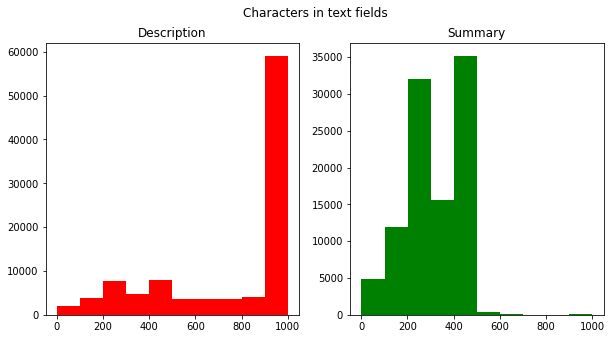

In [0]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
desc_len=df_listings['description'].str.len()
ax1.hist(desc_len,color='red')
ax1.set_title('Description')
summary_len=df_listings['summary'].str.len()
ax2.hist(summary_len,color='green')
ax2.set_title('Summary')
fig.suptitle('Characters in text fields')
plt.show()

**Number of words in text fields**

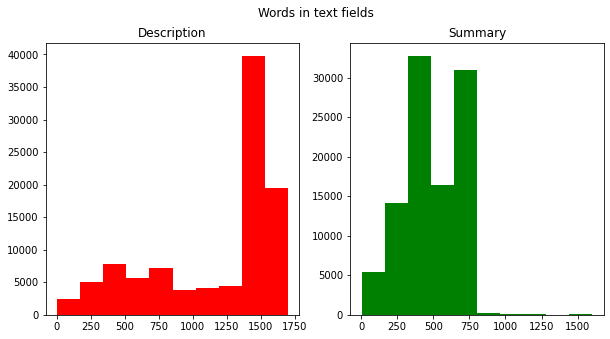

In [0]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
desc_len=df_listings['description'].str.split().map(lambda x: len(str(x)))
ax1.hist(desc_len,color='red')
ax1.set_title('Description')
summary_len=df_listings['summary'].str.split().map(lambda x: len(str(x)))
ax2.hist(summary_len,color='green')
ax2.set_title('Summary')
fig.suptitle('Words in text fields')
plt.show()

**Let's examine the summary and description closely**

In [0]:
df_listings[['description','summary']]

,description,summary
0,Come enjoy my 3 bedroom/2 bathroom apartment,Come enjoy my 3 bedroom/2 bathroom apartment
1,Our place is a beautifully renovated entire br...,Our place is a beautifully renovated entire br...
2,10 minute walk from Fort Greene Park. A lot of...,10 minute walk from Fort Greene Park. A lot of...
3,Make yourself at home in our beautiful 600sq. ...,Make yourself at home in our beautiful 600sq. ...
4,South Slope Brooklyn 3br 2 bath condo availabl...,South Slope Brooklyn 3br 2 bath condo availabl...
...,...,...
99989,A beautiful 2300sqft loft facing south. The lo...,A beautiful 2300sqft loft facing south. The lo...
99990,I'm looking to sublet my fully furnished 1 bed...,I'm looking to sublet my fully furnished 1 bed...
99991,"Located in Washington Heights, and 2 short blo...","Located in Washington Heights, and 2 short blo..."
99992,1 block away from the 1 train and a 5 minute w...,1 block away from the 1 train and a 5 minute w...


In [0]:
df_listings.iloc[7]['summary']

'Spacious, modern & quiet apartment in doormen luxury building, ideal for a couple /small family /group of friends looking to have the most pleasant stay in the greatest city! Appartement spacieux, moderne et calme dans un bâtiment "luxe" avec doormen, idéal pour un couple /petite famille/groupe d\'amis.'

In [0]:
df_listings.iloc[7]['description']

'Spacious, modern & quiet apartment in doormen luxury building, ideal for a couple /small family /group of friends looking to have the most pleasant stay in the greatest city! Appartement spacieux, moderne et calme dans un bâtiment "luxe" avec doormen, idéal pour un couple /petite famille/groupe d\'amis. Large space (710 sq feet/ 65 m2), very comfortable for a couple or small family/ group of friends. Modern and cozy, you will feel just like at home :) Guests can access the entire apartment. I will just keep a closet closed to keep my personal belongings. Guests will also have access to the rooftop which has an incredible view of the Chrysler building and the Met building from up close as well as the East and Hudson rivers - a must see! You can reach me anytime by email/ phone - I will be happy to answer any questions you have! Midtown East is extremely convenient as it is the most central in Manhattan. The apartment is just a few blocks away from Grand Central (which connects you to e

**It can be observed that summary is the shortened version of description. Hence we only keep the description.**

In [0]:
df_listings = df_listings.drop('summary', axis = 1)

Next we can examine the punctuations, stop words and common words in description.

In [0]:
def create_corpus(target):
    corpus=[]
    
    for x in df_listings[target].str.split():
        for i in x:
            corpus.append(i)
    return corpus

**Stop words in description**

In [0]:
from collections import defaultdict
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<BarContainer object of 10 artists>

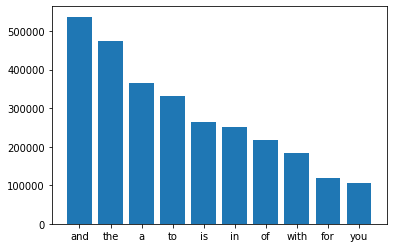

In [0]:
corpus=create_corpus('description')

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

**Punctuations in description**

<BarContainer object of 35 artists>

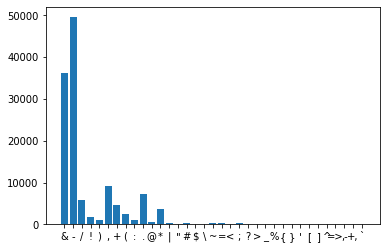

In [0]:
dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]        
x,y=zip(*dic.items())
plt.bar(x,y)

**Frequent words in description**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


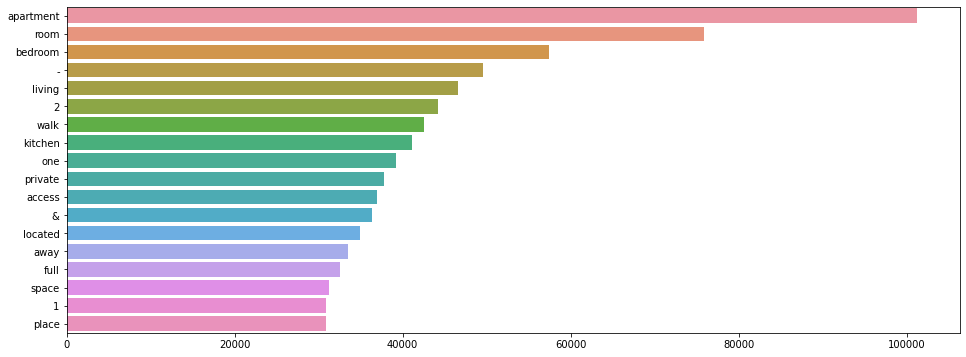

In [0]:
from collections import  Counter
import seaborn as sns
counter = Counter(corpus)
dic=defaultdict(int)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:50]:
    if (word.lower() not in stop) :
        x.append(word)
        y.append(count)
plt.figure(figsize=(16, 6))
sns.barplot(x=y,y=x)

It can be observed that the description field contains a lot of stopwords and punctuations. Hence we will conduct some text cleaning.

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import re

stop = set(stopwords.words('english'))
# add in some common words in the description to the stop words collection
stop.add("apartment")
stop.add("nyc")
stop.add("new")
stop.add("york")
stop.add("s")
stop.add("place")
stop.add("area")
stop.add("room")
stop.add("one")
stop.add("two")
stop.add("also")
# removing stopwords, punctuations and convert to lower case
def clean(doc):
    doc = doc.lower()
    stop_free = " ".join([word for word in doc.split() if word not in stop])
    punc_free = re.sub('[^A-Za-z0-9]+', ' ', stop_free)
    return punc_free

df_listings['description'] = df_listings['description'].map(lambda x: clean(x)) 

df_listings.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,accommodates,amenities,availability_365,bathrooms,bed_type,bedrooms,beds,calendar_last_scraped,cancellation_policy,cleaning_fee,description,extra_people,guests_included,host_has_profile_pic,host_identity_verified,host_is_superhost,host_total_listings_count,host_verifications,id,instant_bookable,is_business_travel_ready,last_scraped,latitude,longitude,maximum_nights,minimum_nights,neighbourhood,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,review_scores_rating,room_type
0,7.0,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,Wa...",144.0,2.0,Real Bed,3.0,4.0,2018-10-03,strict_14_with_grace_period,100.0,come enjoy 3 bedroom 2 bathroom,0.0,1.0,1,0,0,1.0,6,2.8441e+07,1,0,2018-10-03,40.726923,-73.981020,1125.0,2.0,Alphabet City,2.0,475.0,Apartment,0,0,100.0,Entire home/apt
1,2.0,"{Wifi,""Air conditioning"",Kitchen,""Indoor firep...",0.0,1.0,Real Bed,1.0,1.0,2019-12-05,moderate,40.0,beautifully renovated entire brownstone brookl...,20.0,1.0,1,1,0,2.0,5,2.17995e+07,0,0,2019-12-05,40.685070,-73.935650,21.0,1.0,Bedford-Stuyvesant,1.0,60.0,House,0,0,100.0,Private room
2,2.0,"{Wifi,Kitchen,Heating,Shampoo,""Lock on bedroom...",0.0,1.0,Real Bed,1.0,1.0,2018-04-07,flexible,NaN,10 minute walk fort greene park lot natural su...,0.0,1.0,1,0,0,2.0,7,1.64062e+07,1,0,2018-04-07,40.696133,-73.973640,7.0,3.0,Brooklyn Navy Yard,0.0,80.0,Apartment,0,0,NaN,Private room
3,5.0,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",16.0,1.0,Real Bed,1.0,3.0,2018-02-03,strict,NaN,make home beautiful 600sq feet 60 sq meter bed...,10.0,2.0,1,0,0,1.0,7,1.95542e+07,0,0,2018-02-03,40.705261,-74.010263,1125.0,3.0,Financial District,18.0,225.0,Apartment,0,0,86.0,Entire home/apt
4,6.0,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",0.0,2.0,Real Bed,3.0,3.0,2019-10-14,strict_14_with_grace_period,100.0,south slope brooklyn 3br 2 bath condo availabl...,0.0,1.0,1,0,0,1.0,8,2.58015e+07,1,0,2019-10-14,40.661320,-73.991920,31.0,3.0,Greenwood Heights,6.0,280.0,Condominium,0,0,100.0,Entire home/apt


## 3. Explore categorical fields and their relationship with listing price
Some EDA is done here to visualise the importance of categories in categorical fields to price.


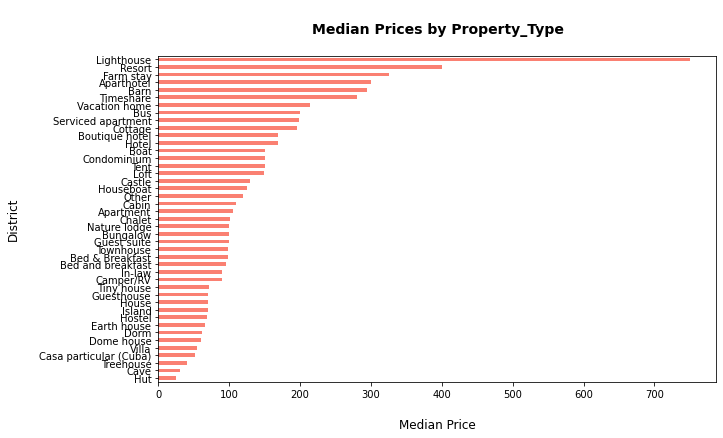

In [0]:
import matplotlib.pyplot as plt
df_grouped = pd.DataFrame(df_listings.groupby(['property_type'])['price'].agg(np.median))
df_grouped.reset_index(inplace=True)

# plot this 
df_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='property_type', y='price', 
                figsize=(10,6), legend=False, color='salmon')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nMedian Prices by Property_Type\n', fontsize=14, fontweight='bold');

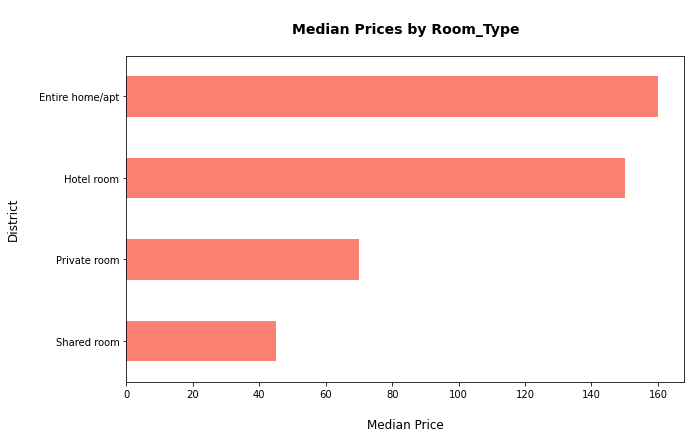

In [0]:
df_grouped = pd.DataFrame(df_listings.groupby(['room_type'])['price'].agg(np.median))
df_grouped.reset_index(inplace=True)

# plot this 
df_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='room_type', y='price', 
                figsize=(10,6), legend=False, color='salmon')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nMedian Prices by Room_Type\n', fontsize=14, fontweight='bold');

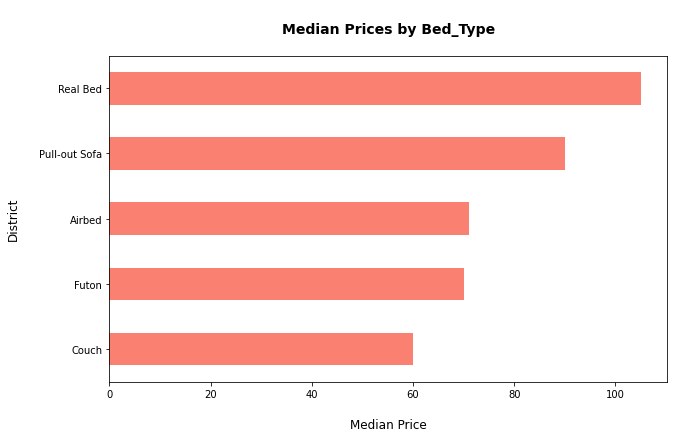

In [0]:
df_grouped = pd.DataFrame(df_listings.groupby(['bed_type'])['price'].agg(np.median))
df_grouped.reset_index(inplace=True)

# plot this 
df_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='bed_type', y='price', 
                figsize=(10,6), legend=False, color='salmon')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nMedian Prices by Bed_Type\n', fontsize=14, fontweight='bold');

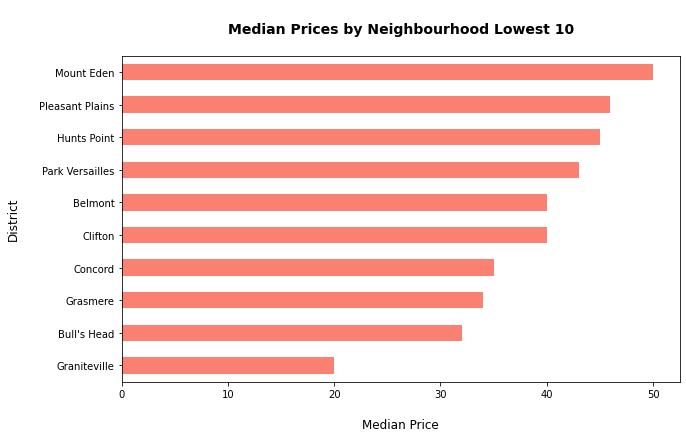

In [0]:
df_grouped = pd.DataFrame(df_listings.groupby(['neighbourhood'])['price'].agg(np.median))
df_grouped.reset_index(inplace=True)

# As there are too many neighbourhoods, I plot lowest 10 and highest 10 
df_grouped.sort_values(by=['price'], ascending=True)[:10]\
          .plot(kind='barh', x='neighbourhood', y='price', 
                figsize=(10,6), legend=False, color='salmon')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nMedian Prices by Neighbourhood Lowest 10\n', fontsize=14, fontweight='bold');

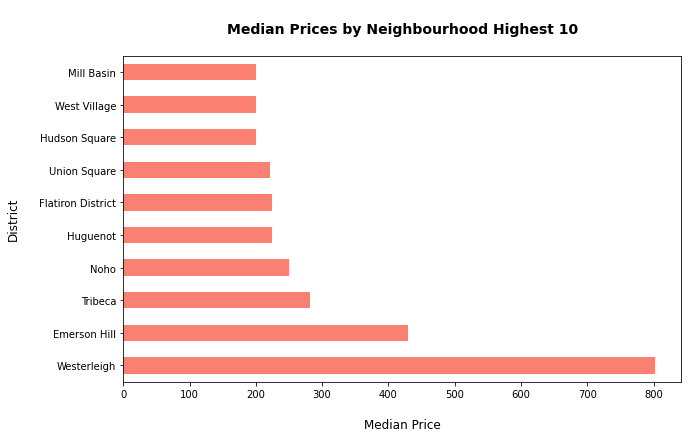

In [0]:
df_grouped.sort_values(by=['price'], ascending=False)[:10]\
          .plot(kind='barh', x='neighbourhood', y='price', 
                figsize=(10,6), legend=False, color='salmon')
plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nMedian Prices by Neighbourhood Highest 10\n', fontsize=14, fontweight='bold');

## 4. Explore numerical fields and their correlation with price
Next we will explore what are the fields that have little correlation with price. Usually those fields won't add much insights on the prediction process.


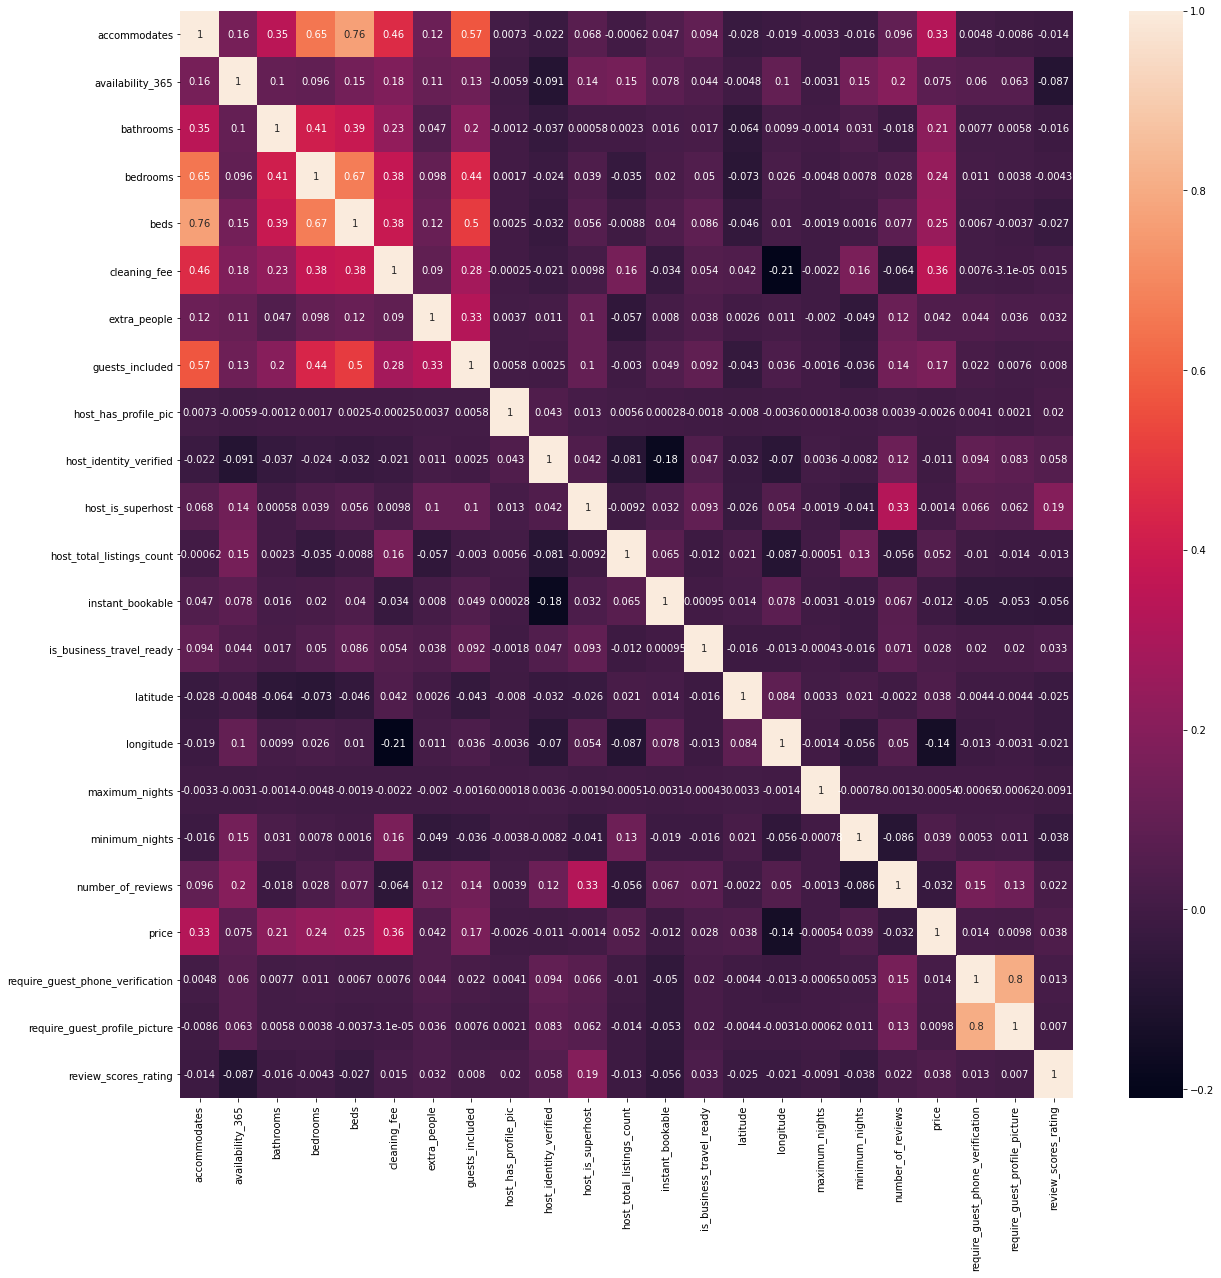

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_listings.corr()
fig, ax = plt.subplots(figsize=(20,20))
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot = True)

# Finally, let's export the file after all the preprocessing

In [0]:
df_listings.head()

,accommodates,amenities,availability_365,bathrooms,bed_type,bedrooms,beds,calendar_last_scraped,cancellation_policy,cleaning_fee,description,extra_people,guests_included,host_has_profile_pic,host_identity_verified,host_is_superhost,host_total_listings_count,host_verifications,id,instant_bookable,is_business_travel_ready,last_scraped,latitude,longitude,maximum_nights,minimum_nights,neighbourhood,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,review_scores_rating,room_type
0,7.0,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,Wa...",144.0,2.0,Real Bed,3.0,4.0,2018-10-03,strict_14_with_grace_period,100.0,come enjoy 3 bedroom 2 bathroom,0.0,1.0,1,0,0,1.0,6,2.8441e+07,1,0,2018-10-03,40.726923,-73.981020,1125.0,2.0,Alphabet City,2.0,475.0,Apartment,0,0,100.0,Entire home/apt
1,2.0,"{Wifi,""Air conditioning"",Kitchen,""Indoor firep...",0.0,1.0,Real Bed,1.0,1.0,2019-12-05,moderate,40.0,beautifully renovated entire brownstone brookl...,20.0,1.0,1,1,0,2.0,5,2.17995e+07,0,0,2019-12-05,40.685070,-73.935650,21.0,1.0,Bedford-Stuyvesant,1.0,60.0,House,0,0,100.0,Private room
2,2.0,"{Wifi,Kitchen,Heating,Shampoo,""Lock on bedroom...",0.0,1.0,Real Bed,1.0,1.0,2018-04-07,flexible,NaN,10 minute walk fort greene park lot natural su...,0.0,1.0,1,0,0,2.0,7,1.64062e+07,1,0,2018-04-07,40.696133,-73.973640,7.0,3.0,Brooklyn Navy Yard,0.0,80.0,Apartment,0,0,NaN,Private room
3,5.0,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",16.0,1.0,Real Bed,1.0,3.0,2018-02-03,strict,NaN,make home beautiful 600sq feet 60 sq meter bed...,10.0,2.0,1,0,0,1.0,7,1.95542e+07,0,0,2018-02-03,40.705261,-74.010263,1125.0,3.0,Financial District,18.0,225.0,Apartment,0,0,86.0,Entire home/apt
4,6.0,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",0.0,2.0,Real Bed,3.0,3.0,2019-10-14,strict_14_with_grace_period,100.0,south slope brooklyn 3br 2 bath condo availabl...,0.0,1.0,1,0,0,1.0,8,2.58015e+07,1,0,2019-10-14,40.661320,-73.991920,31.0,3.0,Greenwood Heights,6.0,280.0,Condominium,0,0,100.0,Entire home/apt


In [0]:
df_listings.to_csv('/content/gdrive/My Drive/BT4222 project/Feature Engineering Data/afterpreprocessing.csv', index = False)